<a href="https://colab.research.google.com/github/Matheus5S/Python/blob/main/An%C3%A1lise_1_Trade_Quantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
## Run This Cell for Colab
!pip install yfinance
!pip install vectorbt
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 538 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 7.3 MB/s 
     |████████████████████████████████| 292 kB 45.5 MB/s 
     |████████████████████████████████| 1.6 MB 38.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 267 kB/s 


In [ ]:
import vectorbt as vbt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Definindo parâmetros

In [ ]:
# Análise de Crypto
codigo = 'BTC-USD'
ativos_comparacao = [codigo, 'ETH-USD', 'ADA-USD']
 
 
data_inicial = '2018-01-01'  
data_final = '2019-01-01'


# Os preços de fechamentos dos ativos
vbt.YFData.download(ativos_comparacao, start=data_inicial, end=data_final).get('Close')

symbol,BTC-USD,ETH-USD,ADA-USD
Date,,,
2018-01-01 00:00:00+00:00,13657.200195,772.640991,0.728657
2018-01-02 00:00:00+00:00,14982.099609,884.443970,0.782587
2018-01-03 00:00:00+00:00,15201.000000,962.719971,1.079660
2018-01-04 00:00:00+00:00,15599.200195,980.921997,1.114120
2018-01-05 00:00:00+00:00,17429.500000,997.719971,0.999559
...,...,...,...
2018-12-27 00:00:00+00:00,3654.833496,116.575912,0.036944
2018-12-28 00:00:00+00:00,3923.918701,137.647018,0.041862
2018-12-29 00:00:00+00:00,3820.408691,138.018341,0.041508


## Baixando os dados

In [ ]:
precos = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get()
fechamento = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get('Close')

# Analisando a Série

In [ ]:
fechamento.vbt.plot().show()

In [ ]:
precos.vbt.ohlcv.plot().show()

## Gráfico comparativo

Com investimento inicial de \$1 (ou R\$ 1)

In [ ]:
vbt.YFData.download(ativos_comparacao,
                    start=data_inicial,
                    end=data_final).plot(column='Close', base=1).show()

## Gráfico Quant Stat

Retorno Cumulativo, Drawdown e Retorno Diário

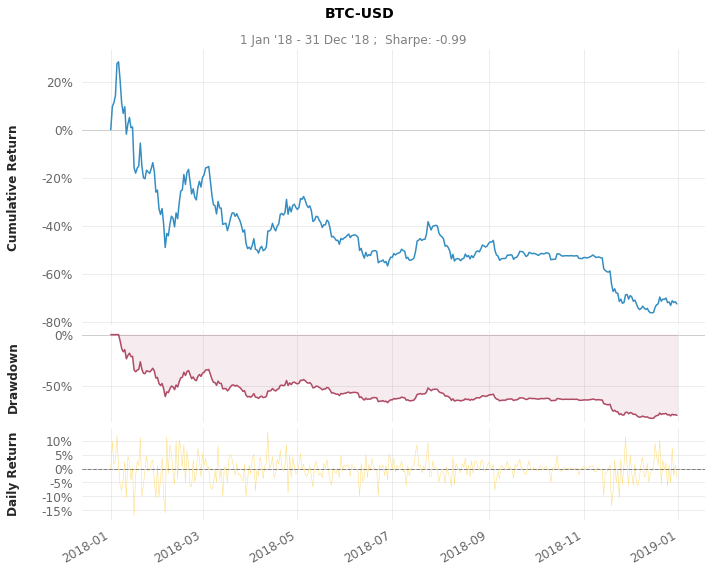

In [ ]:
warnings.filterwarnings('ignore')

retornos = fechamento.vbt.to_returns()
retornos.vbt.returns.qs.plot_snapshot(title=codigo)

## Analise Geral
Ao analisar os ativos de BTC, ETH e ADA nos periodos de Janeiro de 2018 até Janeiro de 2019, foi possivel observar uma enorme decrescente dos ativos durante o periodo, no qual se concentrou o maior numero de volume de transações no periodo de Janeiro de 2018. Ao final do periodo foi possivel observar os três ativos em queda. A maior queda apresentada foi a de ETH que apresentou um pico de 1.8 por dolar, fechou em 0.18 ao final do periodo de analise.







# Analisando Estratégias de Trade

## Simple Moving Averages

In [ ]:
n_periodos_curta = 20
n_periodos_longa = 50

media_curta = vbt.MA.run(fechamento, n_periodos_curta, short_name='media_curta')
media_longa = vbt.MA.run(fechamento, n_periodos_longa, short_name='media_longa')

fig = fechamento.vbt.plot(trace_kwargs=dict(name='Preço de Fechamento'))
media_curta.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Curta'), fig=fig)
media_longa.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Longa'), fig=fig)

fig.show()


Atravês das analises de media movel é possivel rastrear a tendência do mercado, com isso em mente é possivel indentificar que ambos as medidas usadas (curta e longa) apresentaram pouca divergencia de resultados sendo a Média Curta mais fiel ao resultado final ao longo do periodo de analise.

## Relative Strength Index

In [ ]:
rsi = vbt.RSI.run(fechamento)
rsi.plot().show()



```
# Isto está formatado como código
```


RSI apresenta quando os mercados estão sobrecomprados ou sobrevendidos, pois o foco do indicador é mostrar o quanto um ativo ainda tem de fôlego de alta ou baixa antes de uma reversão. O grafico apresentou uma estabilidade grande até julho de 2018 no qual a baixa nunca passava dos 20 pontos e alta sempre quebrava barreiras mês após mês. Apartir do final de julho os papeis se iverteram, a sobrevenda ultrapassou a resistencia de 20 pontos,consequentemente a compra tambem não chegava mais em seu pico.




```
# Isto` está formatado como código`
```

## Stochastics

A função TA-Lib Stoch retorna duas linhas lentas K  e lentas D que podem ser usadas para gerar os indicadores de compra/venda.
Um sinal de cruzamento ocorre quando as duas linhas se cruzam na região de sobrecompra (geralmente acima de 80) ou na região de sobrevenda (geralmente abaixo de 20).
Quando uma linha lenta K cruza abaixo da linha D lenta na região de sobrecompra, isso é considerado um indicador de venda.
Por outro lado, quando uma linha lenta K crescente cruza acima da linha lenta D na região de sobrevenda, isso é considerado um indicador de compra.

In [ ]:
vbt.STOCH.run(precos['High'], precos['Low'], precos['Close']).plot().show()

Pesquise sobre o indicador estocástico e escreva aqui a interpretação do gráfico acima.

Com base nos graficos as oportunidades de compra do ativo são muito mais frequentes que a de venda, sendo assim, o fim do periodo de 31 de Dezembro indica que ocorrerá outra oportunidade de compra.



## Bollinger Bands

In [ ]:
vbt.BBANDS.run(fechamento).plot().show()

**Pesquise sobre bandas de bolinger e escreva aqui a interpretação do gráfico acima.**

Ao medir a volatilidade dos preços, as Bandas de Bollinger ajustam-se as condições do mercado, sendo as faixas superiores e inferiores como alvos de preço. Durante os periodos de Janeiro até Setembro a volatilidade dos preços se manteve semelhante alcançando em sua maioria das vezes a linha de baixo, indicando sobrevenda caracterizado como hora da compra. Entre o final de Setembro e Novembro a volatilidade diminuiu, se estabilizando, mas após o fim desse periodo se manteve atingindo a linha de baixo, priorizando as oportunidades de compra.